Breast Cancer
1) 차원축소: 2, 5, 10
2) 분류 정확도: 원본, 2, 5, 10
3) 2차원 시각화
4) 군집화
+) 실루엣 평가

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 차원 축소

In [263]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [264]:
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
bc_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [265]:
from sklearn.preprocessing import StandardScaler
bc_std = StandardScaler().fit_transform(bc.data)

In [266]:
bc_std[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

In [267]:
from sklearn.decomposition import PCA

In [268]:
pca = PCA(n_components=2)
bc_pca = pca.fit_transform(bc_std)
bc_pca[:1]

array([[9.19283683, 1.94858307]])

In [269]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [270]:
pca2 = PCA(n_components=5)
bc_pca2 = pca2.fit_transform(bc_std)
bc_pca2[:1]

array([[ 9.19283683,  1.94858306, -1.12316629,  3.63373081, -1.19510849]])

In [271]:
pca2.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [272]:
pca3 = PCA(n_components=10)
bc_pca3 = pca3.fit_transform(bc_std)
bc_pca3[:1]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511012,
         1.41142446,  2.15936985, -0.39840846, -0.15711632, -0.87740484]])

In [273]:
pca3.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

### 2. 분류 정확도

In [274]:
from sklearn.linear_model import RandomForestClassifier
from sklearn.model_selection import train_test_split

- 함수 활용

In [ ]:
# def pca_accuracy(X, y):
    # X_train, X_test, y_train, y_test = train_test_split(
    # X, y, stratify=bc.target, random_state=2021
    # )
    # lrc = LogisticRegression(random_state=2021)
    # lrc.fit(X_train, y_train)
    # score = lrc.score(X_test, y_test)
    # return np.round(score, 4)

In [ ]:
# print('PCA 2 정확도:', pca_accuracy(bc_pca2, bc.target))
# print('PCA 5 정확도:', pca_accuracy(bc_pca5, bc.target))
# print('PCA 10 정확도:', pca_accuracy(bc_pca10, bc.target))
# print('원데이터 정확도:', pca_accuracy(bc_std, bc.target))

In [275]:
# 원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [276]:
# 2차원 PCA 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca, bc.target, stratify=bc.target, random_state=2021
)
rfc =RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9440559440559441

In [277]:
# 5차원 PCA 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca2, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.965034965034965

In [278]:
# 10차원 PCA 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca3, bc.target, stratify=bc.target, random_state=2021
)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.972027972027972

### 03. 시각화

In [279]:
df = pd.DataFrame(bc_pca, columns=['PC1','PC2'])
df['target'] = bc.target
df.head(3)

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0


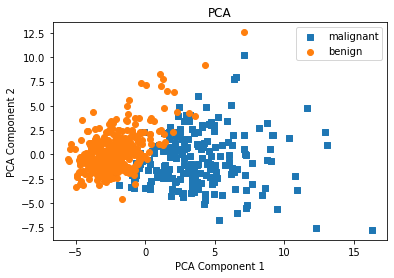

In [280]:
markers = ['s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=bc.target_names[i])
plt.legend()
plt.title('PCA')
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()

In [281]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['PC1'] = bc_pca[:,0]
df['PC2'] = bc_pca[:,1]
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174


### 4-1. 군집화

In [282]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)

In [283]:
kmeans.fit(bc_std)

KMeans(n_clusters=2, random_state=2021)

In [284]:
# kmeans.labels_

In [285]:
df['target'] = bc.target
df['cluster'] = kmeans.labels_
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2,target,cluster
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,6.439315,-3.576817,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,3.793382,-3.584048,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1.256179,-1.902297,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,10.374794,1.672010,0,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,-5.475243,-0.670637,1,1


- n_cluster=()에서 괄호안에 들어가는 숫자는 몇 개의 집단으로 나눌 것인지
- 차원으로 착각해서 5, 10도 시도해 봄

In [286]:
# kmeans2 = KMeans(n_clusters=5, random_state=2021)

In [287]:
# kmeans2.fit(bc_std)

In [288]:
# kmeans2.labels_

In [289]:
# df['target'] = bc.target
# df['cluster2'] = kmeans2.labels_
# df.tail()

In [290]:
# kmeans3 = KMeans(n_clusters=10, random_state=2021)

In [291]:
# kmeans3.fit(bc_std)

In [292]:
# kmeans3.labels_

In [293]:
# df['cluster3'] = kmeans3.labels_
# df.tail()

In [294]:
# df[['target','cluster','cluster2','cluster3','mean radius']].groupby(['target','cluster','cluster2','cluster3']).count()

In [295]:
# df[['target','cluster','cluster2','mean radius']].groupby(['target','cluster','cluster2']).count()

In [296]:
df[['target','cluster','mean radius']].groupby(['target','cluster']).count()

mean radius
target cluster             
0      0                176
       1                 36
1      0                 18
       1                339

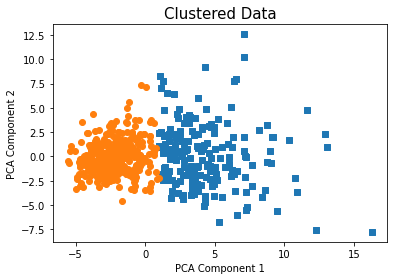

In [297]:
markers = ['s','o']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

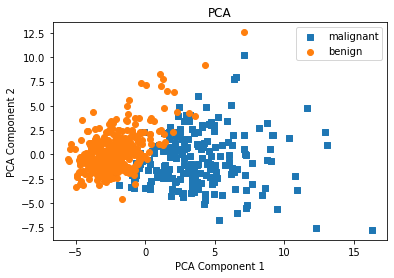

In [298]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=bc.target_names[i])
plt.legend()
plt.title('PCA')
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()

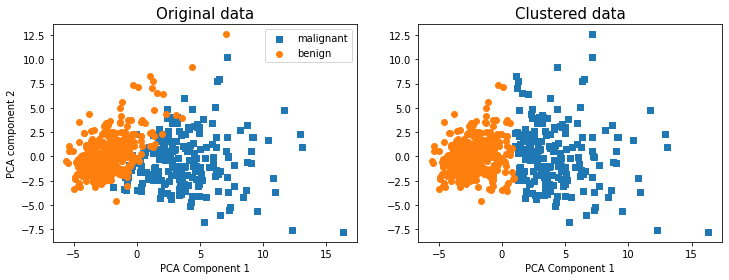

In [299]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker,
                    label=bc.target_names[i])

    if k == 0:
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA component 2')
        ax.legend()
    else:
        ax.set_title('Clustered data', fontsize=15)
    ax.set_xlabel('PCA Component 1')
plt.show()

### 4-2. 실루엣

In [300]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(bc_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2,target,cluster,실루엣 계수
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583,0,0,0.296634
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172,0,0,0.041947
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174,0,0,0.341336


In [301]:
df['실루엣 계수'].mean()

0.3433822406907782

In [302]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196


In [303]:
silhouette_score(bc_std, df.cluster)

0.3433822406907781

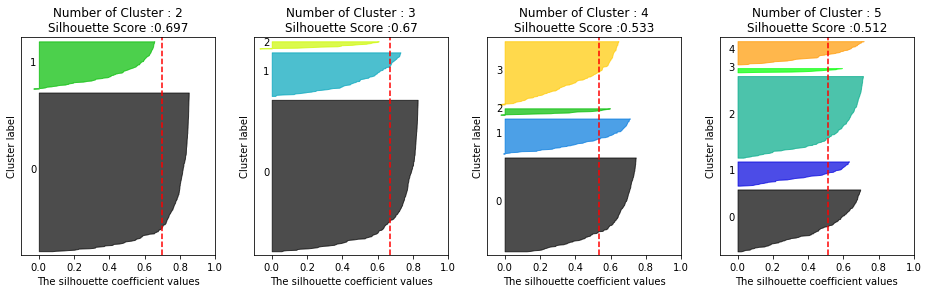

In [304]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], bc.data)